<a href="https://colab.research.google.com/github/amien1410/colab-notebooks/blob/main/Colab_Pyspark_H%26M_EDA_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install Kaggle modules and download the dataset

from google.colab import drive
drive.mount('/content/drive')

!pip install kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'
!kaggle datasets download -d odins0n/hm256x256
!unzip -q "/content/hm256x256.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/odins0n/hm256x256
License(s): other
 99% 2.10G/2.13G [00:16<00:00, 154MB/s]
100% 2.13G/2.13G [00:16<00:00, 139MB/s]


## Let's Explore the H&M Fashion World Together!

Get ready to explore the amazing H&M Personalized Fashion Recommendations dataset! This is a fun challenge from Kaggle. Our main goal? To build a cool system that suggests clothes people will love, based on what they've bought before. But first, we need to get to know our data!

**Why explore this dataset? It's like going on a treasure hunt!**

Exploring our data is super important. It helps us:

*   **See what we have:** Look at all the different pieces of information about customers, clothes, and sales.
*   **Spot any messy bits:** Find things that might be missing or don't look quite right.
*   **Find cool patterns:** Discover interesting trends in what people buy and when.
*   **Get ideas for our model:** Think of clever ways to use the data to make great recommendations.
*   **Choose the best tools:** Figure out which methods will work best for our recommendation system.

**How will we explore? It's easy and fun!**

We'll use simple steps to explore:

*   We'll load everything up so we can see it clearly.
*   We'll look at numbers and pictures to understand things like customer ages and how much clothes cost.
*   We'll see how different pieces of information fit together.
*   We'll check for any missing puzzle pieces.

**What's the big goal of exploring? To become data detectives!**

By exploring, we want to:

*   Really understand the H&M fashion world in our data.
*   Learn all about the customers, the clothes, and the sales.
*   Find exciting clues that will help us build an awesome recommendation system.
*   Get everything ready for the next steps, like preparing the data and building our model.

Let's have fun exploring and build something amazing!

# Firstly first
Let's start by loading all the necessary libraries and the datasets we'll be working with: `articles.csv`, `customers.csv`, and `transactions_train.csv`. This will prepare our environment and make the data available for exploration.

In [2]:
#Load all libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import plotly.graph_objects as go
import datetime as dt
import matplotlib.image as mpimg

#Load all the datasets
articles = pd.read_csv("/content/articles.csv")
customers = pd.read_csv("/content/customers.csv")
transactions = pd.read_csv("/content/transactions_train.csv")

## 📏 Checking the Size of Our Dataframes

Let's find out the shapes of all three dataframes: `articles`, `customers`, and `transactions`. This will tell us how many rows and columns each dataset has, giving us an idea of their size.

In [3]:
# Let's find out the shapes of all three dataframes
shape=pd.DataFrame({"Total Rows":[articles.shape[0],customers.shape[0],transactions.shape[0]],
                    "Total Columns":[articles.shape[1],customers.shape[1],transactions.shape[1]]},index=['articles','customers','transactions'])
shape

,Total Rows,Total Columns
articles,105542,25
customers,1371980,7
transactions,31788324,5


## 🕵️‍♀️ Customer Purchase Analysis

Let's investigate how many customers in our dataset have made at least one transaction compared to those who haven't. This gives us insights into customer activity. 🛍️📊

In [4]:
n = len(pd.unique(transactions['customer_id']))
m = len(pd.unique(customers['customer_id']))
length=len(set(transactions.customer_id.values.tolist()))/customers.shape[0]
npur=100-(length*100)
print("Total No of customers:",m)
print("No of customers who made at least one transaction:",n)
print("% of customers who made a at least one transaction : ",length*100)
print("Number of customers who did not make a purchase : ",(customers.shape[0] - len(set(transactions.customer_id.values.tolist()))))
print("% of customers who did not make a purchase : ",npur)
print("It seems that not all customers made a purchase, there is around 1% with no purchase history.")

Total No of customers: 1371980
No of customers who made at least one transaction: 1362281
% of customers who made a at least one transaction :  99.29306549658158
Number of customers who did not make a purchase :  9699
% of customers who did not make a purchase :  0.7069345034184238
It seems that not all customers made a purchase, there is around 1% with no purchase history.


## 👀 Peeking at the Data

Let's take a look at the first few rows of the `transactions` and `articles` dataframes to understand their structure and see what kind of information they contain.

In [5]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [6]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


## 🕵️‍♀️ Checking for Missing Values in Transactions

Let's check for any missing values in the `transactions` dataset. This is important to understand the completeness of our data. 🤔🔍

In [7]:
#check null values in transaction dataset
transactions.isna().sum()

,0
t_dat,0
customer_id,0
article_id,0
price,0
sales_channel_id,0


## 📅 Transaction Analysis Over Time

Let's group the transactions by date to see the volume of transactions each day. We'll also find out the earliest and latest dates in our transaction data. This gives us a sense of the time period covered. 📈🗓️

In [8]:
year=transactions.groupby('t_dat').count()[['article_id']]
yearwise1=year.reset_index()
#yearwise1.head()
print (transactions.t_dat.min())
print (transactions.t_dat.max())

2018-09-20
2020-09-22


## 🎉 Busiest Transaction Days

Let's find the top 5 days with the highest number of transactions. This will highlight the busiest periods in our dataset! 🎉🗓️

In [9]:
yearasecact = yearwise1.sort_values(['article_id'], ascending=False).head(5)
yearasecact

,t_dat,article_id
373,2019-09-28,198622
569,2020-04-11,162799
435,2019-11-29,160875
64,2018-11-23,142018
9,2018-09-29,141700


## 📊 Visualizing Transaction Volume Over Time

Let's create a plot to see how the number of articles sold changes each day. This will give us a clear picture of the transaction volume over the entire period! ✨📉

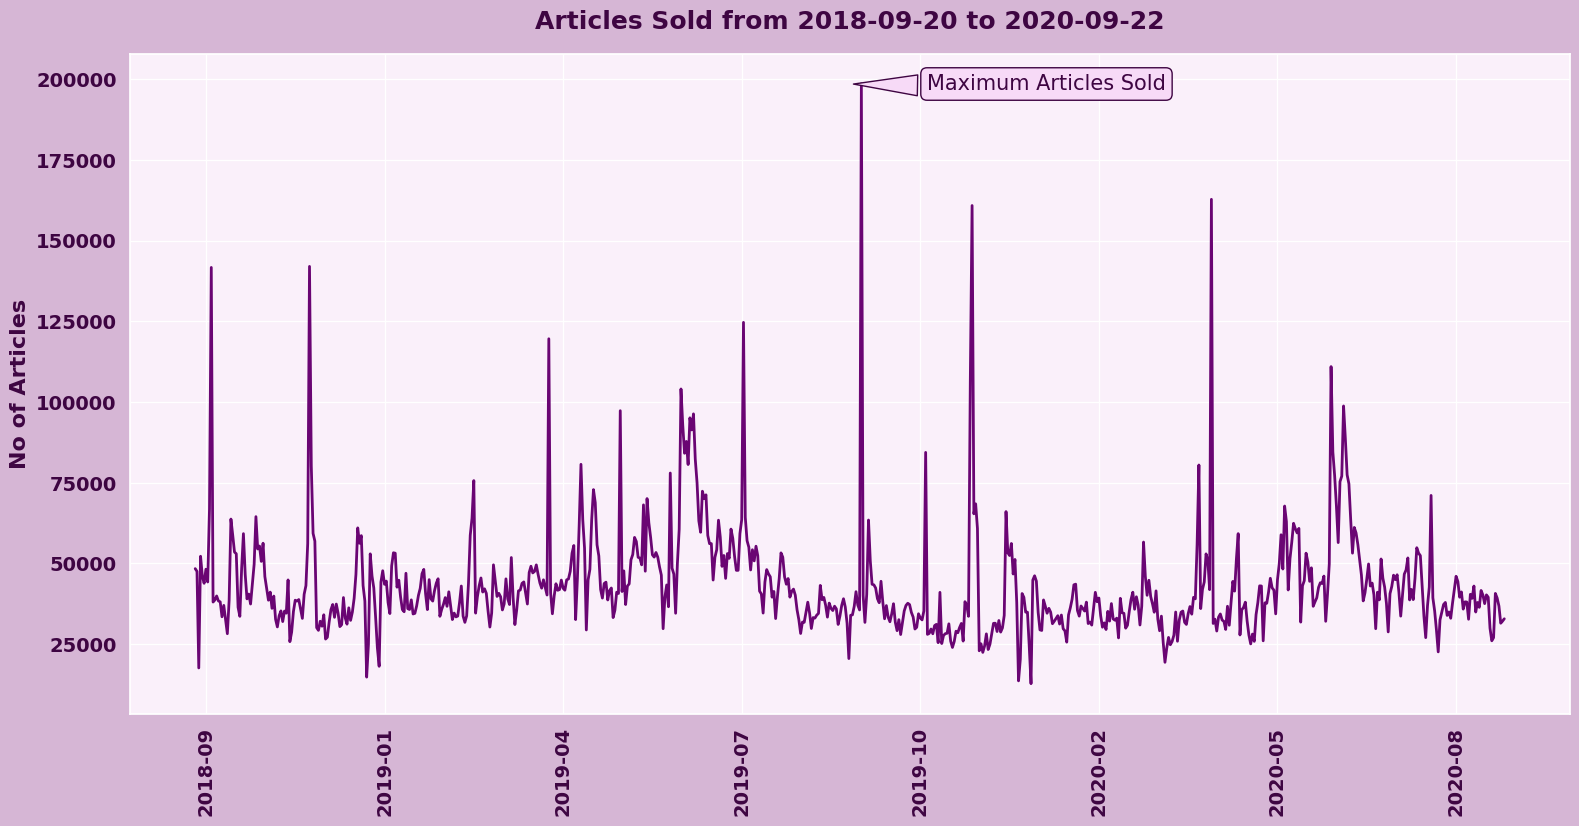

In [10]:
yearwise1['t_dat'] = pd.to_datetime(yearwise1['t_dat'], format='%Y-%m-%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'article_id', data=yearwise1, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Articles Sold from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, fontweight = 'bold')

x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Articles Sold',
            xy=(x_line_annotation, 198522),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7',
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))


ttl.set_position([.5, 1.02])
ax.set_ylabel('No of Articles', color=font_color, fontsize=16, fontweight = 'bold')
plt.xticks(color=font_color, fontweight = 'bold')
plt.yticks(color=font_color, fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit
plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)
plt.show()

## 💰 Daily Sales Value Analysis

Let's calculate the total sales value for each day and find the day with the highest sales. This will show us the peak days in terms of revenue! 💰📈

In [ ]:
# yearp=transactions.groupby('t_dat').sum()[['price']]
yearp = transactions.groupby('t_dat', as_index=False)['price'].sum()
yearwise1p=yearp.reset_index()
#yearwise1p.head()
print (yearwise1p.price.max())

6161.6030677966


In [14]:
yearasec = yearwise1p.sort_values(['price'], ascending=False).head(5)
yearasec

,index,t_dat,price
373,373,2019-09-28,6161.603068
435,435,2019-11-29,4444.342390
9,9,2018-09-29,4071.381305
569,569,2020-04-11,3961.987763
64,64,2018-11-23,3891.939441


## 📊 Visualizing Daily Sales Value

Let's visualize the total sales value for each day over time. This will show us the revenue trends and highlight any significant peaks or drops in sales. ✨📉

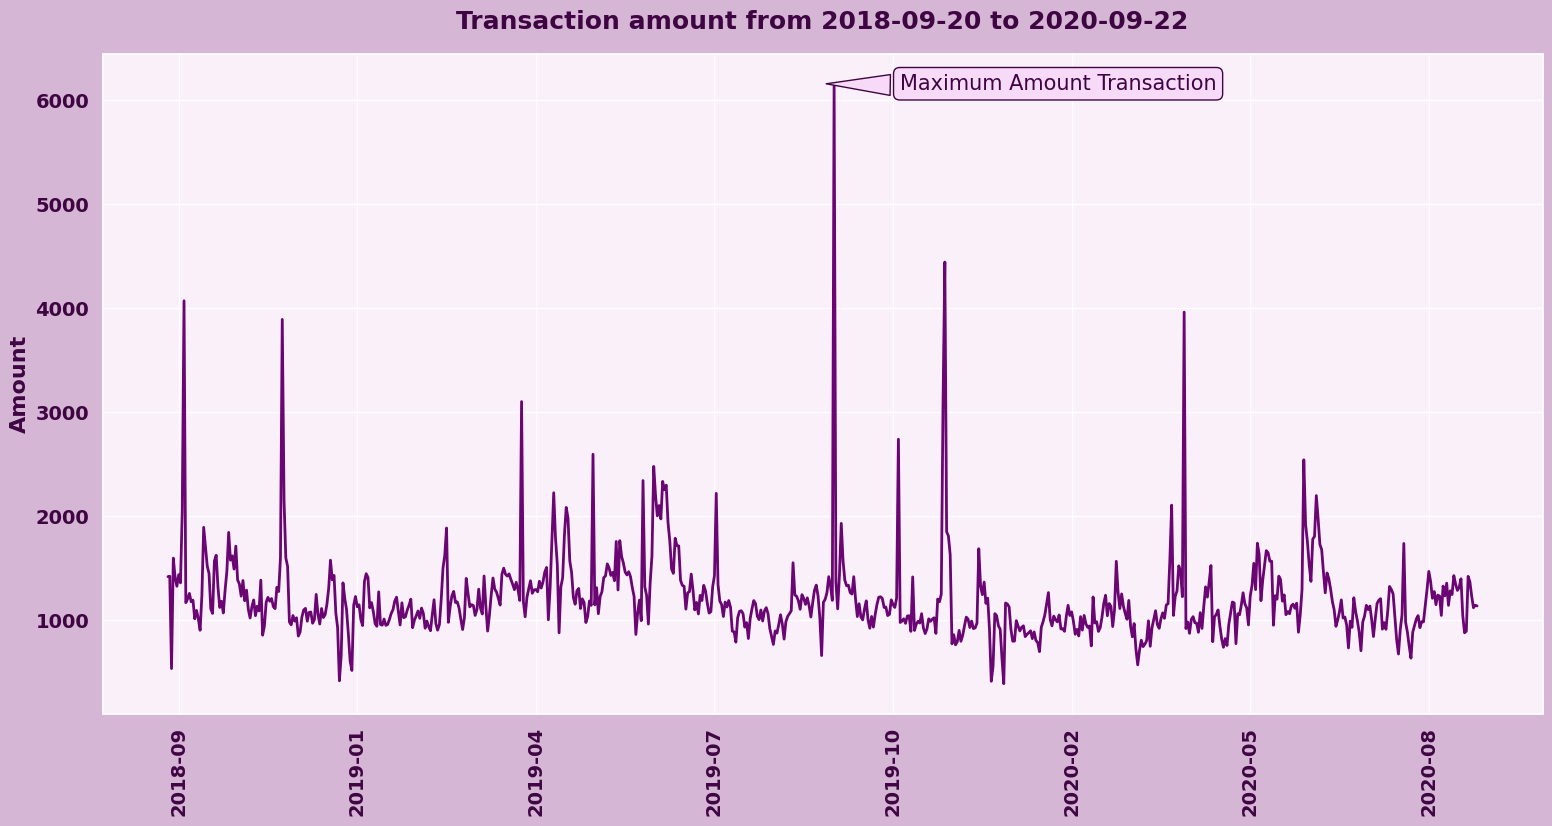

In [17]:
yearwise1p['t_dat'] = pd.to_datetime(yearwise1p['t_dat'], format='%Y-%m-%d')

sns.set(rc={'axes.facecolor':'#faf0fa'}) # graph facecolor
font_color = '#3e0542'
fig, ax = plt.subplots(facecolor='#d6b6d5')
fig.set_size_inches(18,12)

ax.plot('t_dat', 'price', data=yearwise1p, color='#6a0573', linewidth=2)

plt.tight_layout()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.xticks(rotation=90)
ttl = ax.set_title('Transaction amount from 2018-09-20 to 2020-09-22', fontsize=18, pad=18, color=font_color, fontweight = 'bold')
x_line_annotation = dt.datetime(2019,9,22)

ax.annotate('Maximum Amount Transaction',
            xy=(x_line_annotation,6161),
            xycoords='data',
            xytext=(55, 0), textcoords='offset points',
            size=15, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7',
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))

ttl.set_position([.5, 1.02])
ax.set_ylabel('Amount', color=font_color, fontsize=16, fontweight = 'bold')
plt.xticks(color=font_color, fontweight = 'bold')
plt.yticks(color=font_color, fontweight = 'bold')
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
# Adjust subplots so that the title and labels would fit

plt.subplots_adjust(top=0.85, bottom=0.3, left=0.1, right=0.9)
plt.show()

This code is all about visualizing how much money H&M made each day. 💰📈

Here's what each part does:

1.  **`yearwise1p['t_dat'] = pd.to_datetime(yearwise1p['t_dat'], format='%Y/%m/%d')`**: First, we make sure our dates are in the correct format so the computer understands them as dates, not just text. We use `pd.to_datetime` from the **pandas** library for this.

2.  **`sns.set(...)` and `fig, ax = plt.subplots(...)`**: These lines set up the look and feel of our plot. We're using **seaborn** and **matplotlib** to make it visually appealing with specific colors and a good size.

3.  **`ax.plot('t_dat', 'price', data=yearwise1p, ...)`**: This is the core of our plot! We tell it to draw a line graph using the `t_dat` (date) on the bottom (x-axis) and `price` (total sales value) on the side (y-axis).

4.  **`plt.tight_layout()`, `ax.xaxis.set_major_formatter(...)`, `plt.xticks(rotation=90)`**: These lines help format the dates on the bottom of the graph so they don't overlap and are easy to read.

5.  **`ttl = ax.set_title(...)`**: We give our plot a clear and bold title so anyone looking at it knows exactly what it represents.

6.  **`ax.annotate(...)`**: This part adds a little note on the graph pointing out the day with the **maximum transaction amount**. It helps us quickly spot the busiest sales day!

7.  **`ttl.set_position(...)`, `ax.set_ylabel(...)`, `plt.xticks(...)`, `plt.yticks(...)`**: These lines fine-tune the appearance of the title, the label on the side (y-axis), and the numbers on both axes to make them look good and be easy to read.

8.  **`plt.subplots_adjust(...)`**: This helps make sure all the parts of our plot fit nicely without getting cut off.

So, in a nutshell, this code takes our sales data, makes the dates understandable, and then draws a clear picture showing how sales went up and down each day. This helps us see trends and understand which days were the most successful! 🎉

## 🎉 Busiest Transaction Days

Let's find the top 5 days with the highest number of transactions. This will highlight the busiest periods in our dataset! 🎉🗓️

In [18]:
check=transactions.groupby('customer_id').count()[['article_id']].sort_values('article_id', ascending=False)
newcheck=check.head(10)
newcheck1=newcheck.reset_index()

In [19]:
fig = go.Figure(data=[go.Table(
    header=dict(values = [['<b>Customer ID</b><br>Top 10'],
                ['<b>Item Count</b>']],
                fill_color='#d6b6d5',
                font_color="#3e0542",
                align='left'),
    cells=dict(values=[newcheck1.customer_id, newcheck1.article_id],
               fill_color='#faf0fa',
               align='left'))
])

fig.show()